<a href="https://colab.research.google.com/github/Ishakasar/NY_Airbnb/blob/main/Isha_Kasar_Team_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/'
df = pd.read_csv(working_directory + 'AB_NYC_2019.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [54]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [55]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [56]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


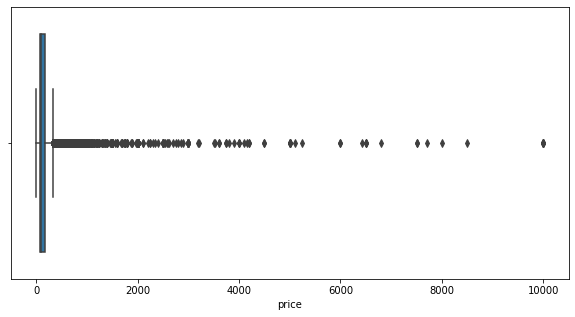

In [57]:
#checking for outliers
sns.boxplot(df['price'])

In [58]:
#creating new test df with specific columns
new_df={'host_id':df['host_id'],'host_name':df['host_name'],'neighbourhood_group' : df['neighbourhood_group'],'neighbourhood':df['neighbourhood'],'latitude':df['latitude'],'longitude':df['longitude'],'room_type':df['room_type'],'price': df['price'],'minimum_nights':df['minimum_nights'],'number_of_reviews': df['number_of_reviews'],'calculated_host_listings_count':df['calculated_host_listings_count']       }
ny=pd.DataFrame(new_df)

In [59]:
'''Our 1st objective is to clean the data
since only the price column is in out control, we'll try detecting and tacling outliers from the column.'''
ny.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000


In [60]:
#remove outliers
Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
ny1=ny[(ny['price']<b) & (ny['price']>a)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


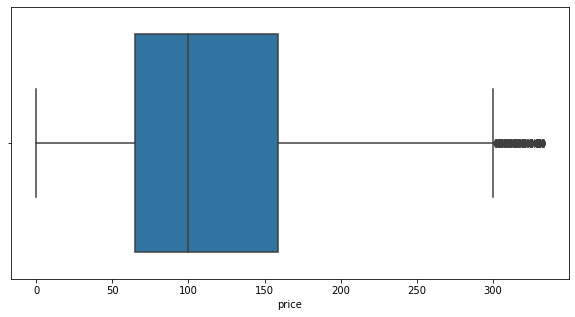

In [61]:
sns.boxplot(ny1['price'])


In [62]:
#Attempt 1 of cleaning the data using np.percentile 
ny1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45918 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         45918 non-null  int64  
 1   host_name                       45897 non-null  object 
 2   neighbourhood_group             45918 non-null  object 
 3   neighbourhood                   45918 non-null  object 
 4   latitude                        45918 non-null  float64
 5   longitude                       45918 non-null  float64
 6   room_type                       45918 non-null  object 
 7   price                           45918 non-null  int64  
 8   minimum_nights                  45918 non-null  int64  
 9   number_of_reviews               45918 non-null  int64  
 10  calculated_host_listings_count  45918 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.2+ MB


In [63]:
ny1.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,6.620193
std,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,30.938400
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000
25%,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,1.000000
50%,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,1.000000
75%,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,2.000000
max,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,327.000000


###From the above calculation even if we have removed outliers we can still see 0 values alsot the loss of dat ais bigger...
### Trying another method that we learned throught google-- numpy quantile


In [64]:
#defining range for reasonable values
air_df=pd.DataFrame(new_df)
min= ny.price.quantile(0.01)
max = ny.price.quantile(0.996)
min, max

(30.0, 1200.0)

In [65]:
air_df= ny[(ny.price>min)&(ny.price<max)]
air_df.head()


,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [66]:
air_df.shape

(48029, 11)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


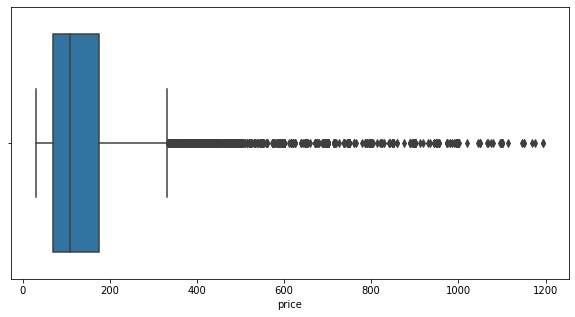

In [67]:
sns.boxplot(air_df['price'])


In [68]:
air_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,4.802900e+04,48029.00000,48029.000000,48029.000000,48029.000000,48029.000000,48029.000000
mean,6.722057e+07,40.72915,-73.952423,143.498636,6.977722,23.449687,7.205397
std,7.850168e+07,0.05425,0.045890,119.297343,20.374710,44.755529,33.227445
min,2.438000e+03,40.49979,-74.244420,31.000000,1.000000,0.000000,1.000000
25%,7.718759e+06,40.69033,-73.983130,70.000000,1.000000,1.000000,1.000000
50%,3.042481e+07,40.72321,-73.955880,109.000000,3.000000,5.000000,1.000000
75%,1.071982e+08,40.76321,-73.936880,175.000000,5.000000,24.000000,2.000000
max,2.743213e+08,40.91306,-73.712990,1195.000000,1250.000000,629.000000,327.000000


In [69]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48029 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48029 non-null  int64  
 1   host_name                       48009 non-null  object 
 2   neighbourhood_group             48029 non-null  object 
 3   neighbourhood                   48029 non-null  object 
 4   latitude                        48029 non-null  float64
 5   longitude                       48029 non-null  float64
 6   room_type                       48029 non-null  object 
 7   price                           48029 non-null  int64  
 8   minimum_nights                  48029 non-null  int64  
 9   number_of_reviews               48029 non-null  int64  
 10  calculated_host_listings_count  48029 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.4+ MB


###Comparing ny1 and ny2 we can see that ny to is much reasonable range for price as well as loss of data is not much. Hence, we have decided to use the ny2 DF.

In [70]:
air_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [71]:
listings_in_ng = air_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].count()

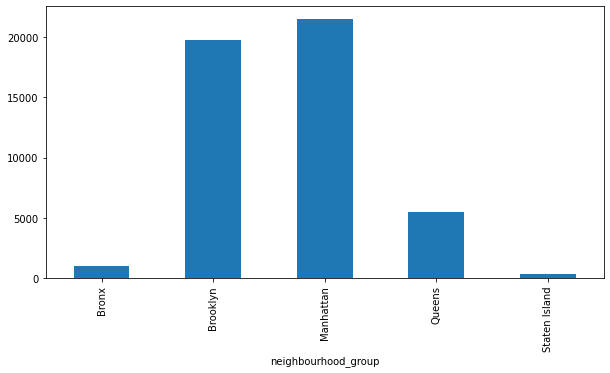

In [72]:
#Relation between neighbourhood group and host listings
listings_in_ng.plot(kind='bar')


In [73]:
neighbourhoodg_price=air_df.groupby(['neighbourhood_group'])['price'].mean()

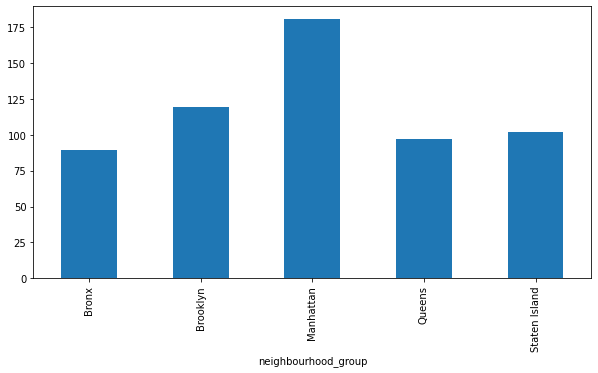

In [74]:
#Relation between neighbourhood group and price
neighbourhoodg_price.plot(kind='bar')


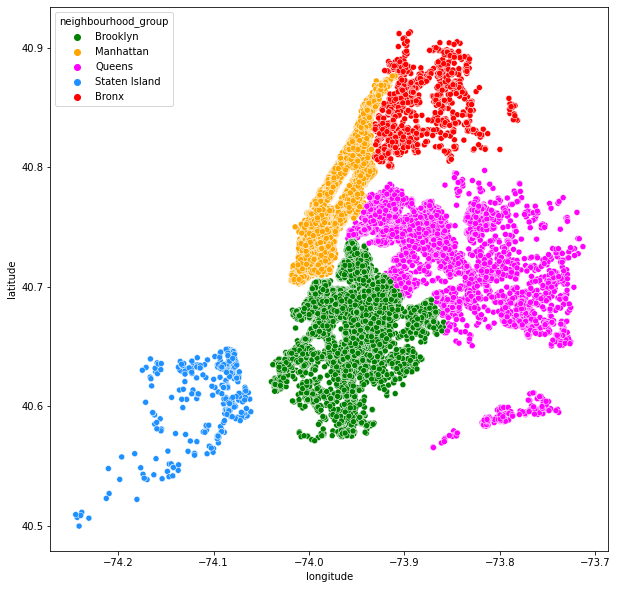

In [75]:
#The following scatter plot shows density in various neighbourhood groups
plt.figure(figsize=(10,10))
ng =sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['green','orange','magenta','dodgerblue','red'], legend='full',data=air_df)


In [76]:
room_price = air_df["room_type"].value_counts()

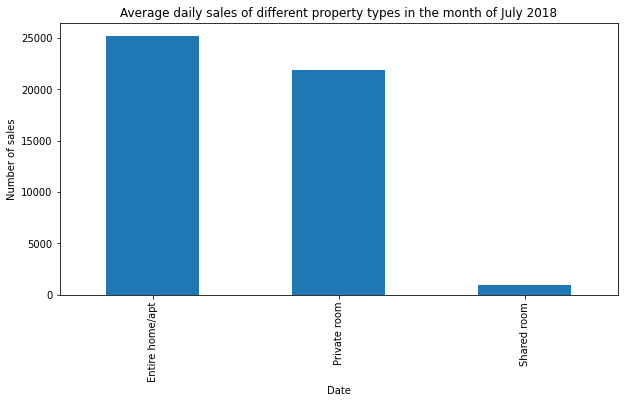

In [77]:
room_price.plot(kind='bar')

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (10, 5)

In [78]:
room_ng=air_df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack()

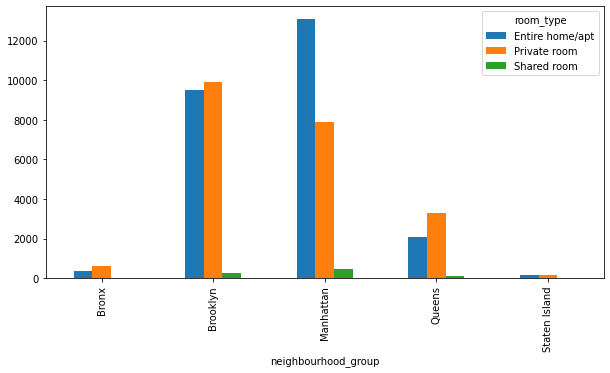

In [79]:
room_ng.plot(kind='bar')


In [80]:
price_night_data_df = air_df[['price', 'minimum_nights']]

In [81]:
corr_df = air_df.corr()

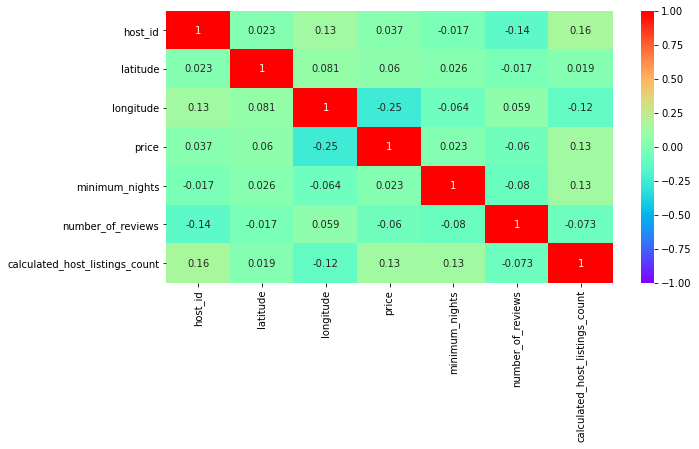

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1, cmap='rainbow', annot=True)

###Inference for neighbourhoods and hosts in various neighbourhood groups

In [83]:
Manhattan=air_df.loc[air_df['neighbourhood_group']=='Manhattan'].reset_index()
Manhattan.drop(['index'], axis=1,inplace= True)


<BarContainer object of 10 artists>

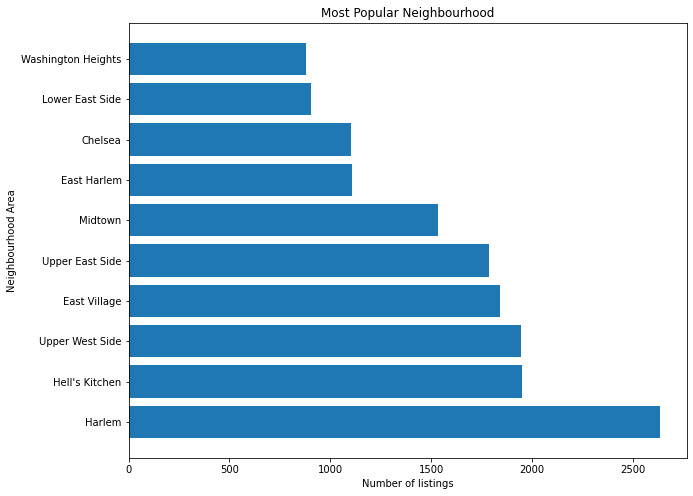

In [84]:
data = Manhattan.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [85]:
Bronx=air_df.loc[air_df['neighbourhood_group']=='Bronx'].reset_index()
Bronx.drop(['index'], axis=1,inplace= True)


<BarContainer object of 10 artists>

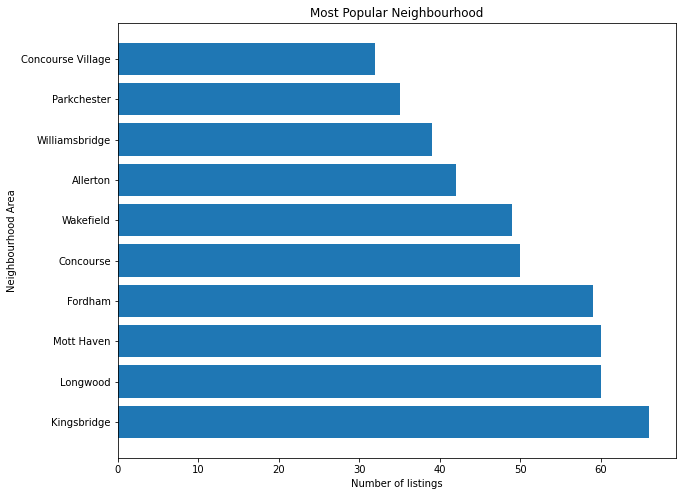

In [86]:
data = Bronx.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [87]:
Brooklyn=air_df.loc[air_df['neighbourhood_group']=='Brooklyn'].reset_index()
Brooklyn.drop(['index'], axis=1,inplace= True)


<BarContainer object of 10 artists>

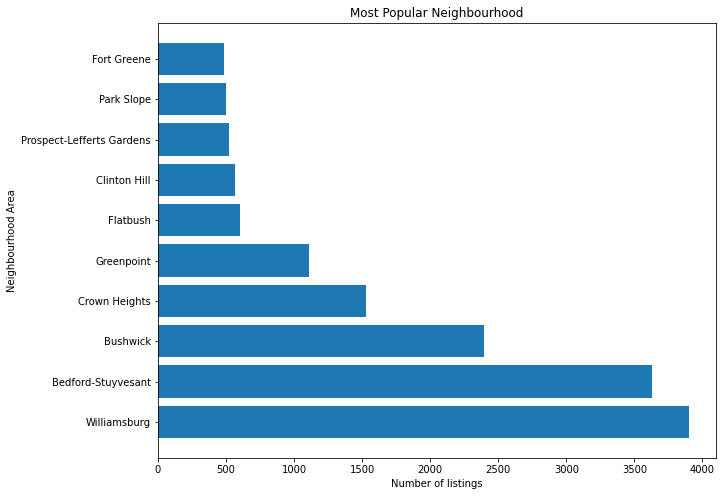

In [88]:
data = Brooklyn.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [89]:
Queens=air_df.loc[air_df['neighbourhood_group']=='Queens'].reset_index()
Queens.drop(['index'], axis=1,inplace= True)


<BarContainer object of 10 artists>

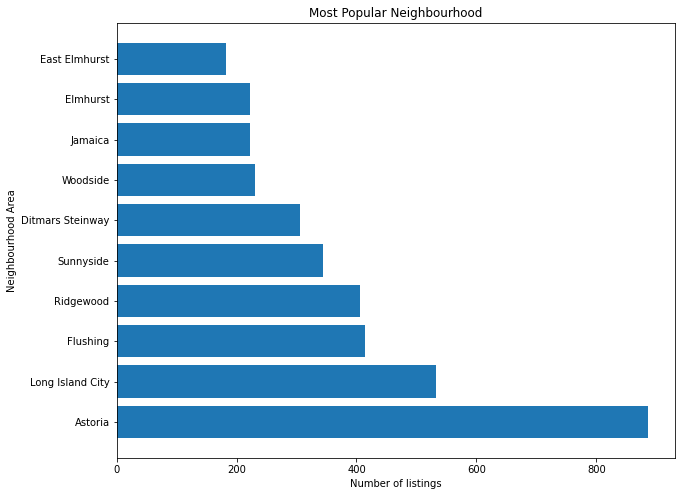

In [90]:
data = Queens.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [91]:
Staten=air_df.loc[air_df['neighbourhood_group']=='Staten Island'].reset_index()
Staten.drop(['index'], axis=1,inplace= True)


<BarContainer object of 10 artists>

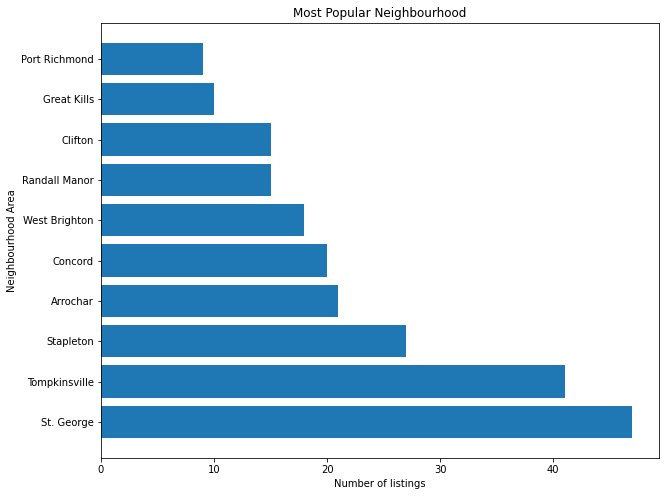

In [92]:
data = Staten.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [93]:
mx_man=air_df.loc[air_df['neighbourhood']=='Harlem'].reset_index()
mx_bronx=air_df.loc[air_df['neighbourhood']=='Kingsbridge'].reset_index()
mx_brook=air_df.loc[air_df['neighbourhood']=='Williamsburg'].reset_index()
mx_queens=air_df.loc[air_df['neighbourhood']=='Astoria'].reset_index()
mx_staten=air_df.loc[air_df['neighbourhood']=='St. George'].reset_index()


<BarContainer object of 10 artists>

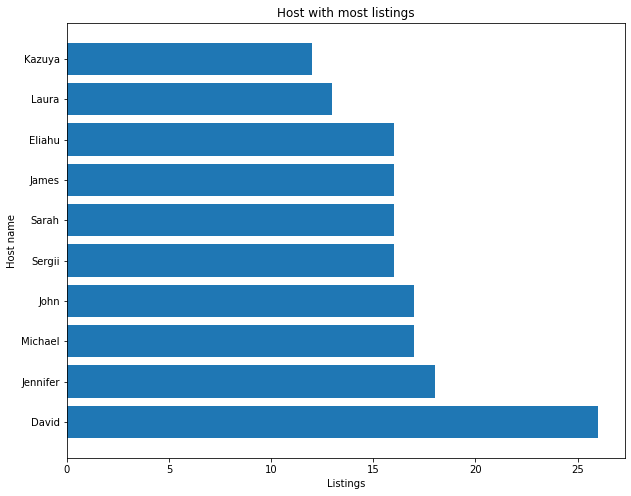

In [94]:
data = mx_man.host_name.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Host with most listings")
plt.ylabel("Host name")
plt.xlabel("Listings")


plt.barh(x, y)

<BarContainer object of 10 artists>

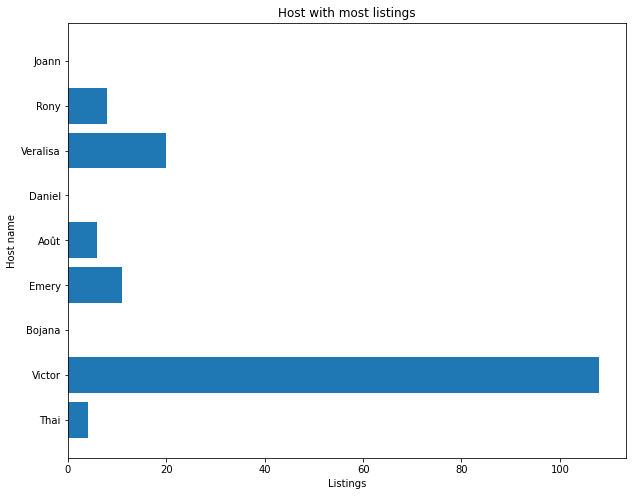

In [95]:
data = mx_bronx.head(10)
plt.figure(figsize=(10, 8))
x = list(data.host_name)
y = list(data.number_of_reviews)

plt.title("Host with most listings")
plt.ylabel("Host name")
plt.xlabel("Listings")


plt.barh(x, y)

<BarContainer object of 10 artists>

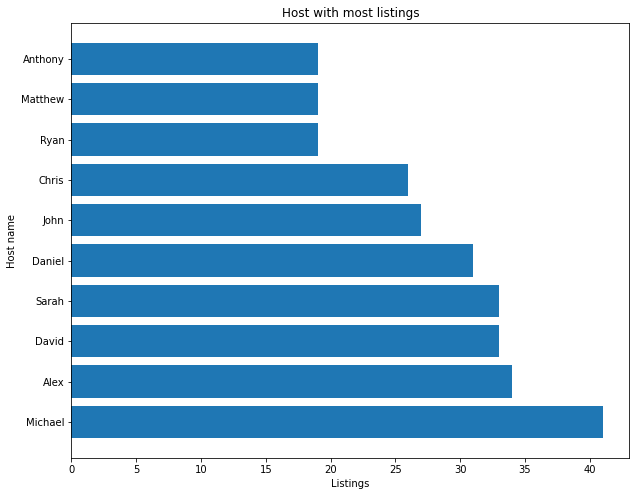

In [100]:
data = mx_brook.host_name.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Host with most listings")
plt.ylabel("Host name")
plt.xlabel("Listings")


plt.barh(x, y)

<BarContainer object of 10 artists>

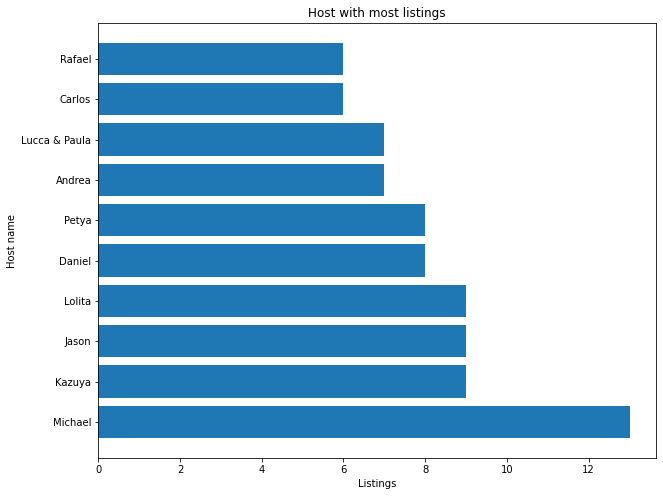

In [97]:
data = mx_queens.host_name.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Host with most listings")
plt.ylabel("Host name")
plt.xlabel("Listings")


plt.barh(x, y)

<BarContainer object of 10 artists>

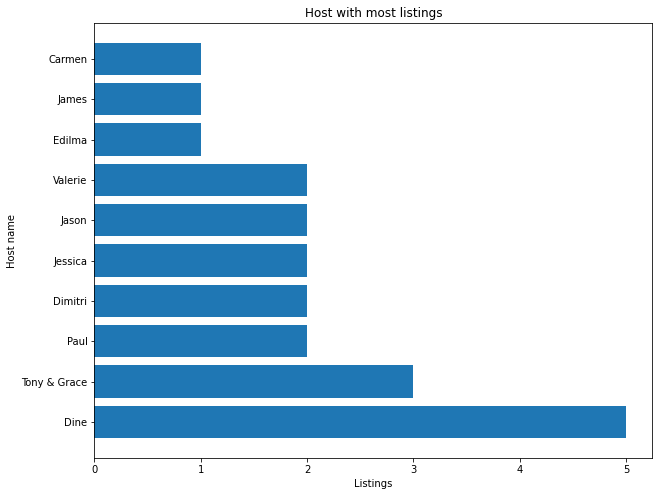

In [98]:
data = mx_staten.host_name.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Host with most listings")
plt.ylabel("Host name")
plt.xlabel("Listings")

plt.barh(x, y)